In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
import json
import time

In [2]:
# Import MSA File
msa_agg = pd.read_csv('MSa_Agg.csv',low_memory=False)
msa_agg["Population_growth_%"]= msa_agg["Population_growth_%"] * 100
msa_agg

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
0,Akron OH,44,684698.0,684197.0,-501.0,0.251995,0.150071,0.015408,-0.112078,-0.073171
1,Albany-Schenectady-Troy NY,97,901947.0,904693.0,2746.0,0.260619,0.153546,0.104488,-0.027628,0.304452
2,Albuquerque NM,41,889636.0,901623.0,11987.0,0.270181,0.104422,0.050645,-0.027977,1.347405
3,Allentown-Bethlehem-Easton PA-NJ,64,831644.0,842025.0,10381.0,0.265437,0.152977,0.044326,-0.080851,1.248250
4,Atlanta-Sandy Springs-Roswell GA,209,5555104.0,5971385.0,416281.0,0.257001,0.199617,0.047287,-0.116082,7.493667
...,...,...,...,...,...,...,...,...,...,...
64,Tucson AZ,37,978564.0,1010951.0,32387.0,0.266035,0.149762,0.039751,-0.091046,3.309646
65,Tulsa OK,97,1080184.0,1113161.0,32977.0,0.244373,0.137870,0.062002,-0.055004,3.052906
66,Virginia Beach-Norfolk-Newport News VA-N,81,1669655.0,1688291.0,18636.0,0.279529,0.131639,0.029646,-0.073649,1.116159
67,Washington-Arlington-Alexandria DC-VA-MD,264,5838956.0,6164488.0,325532.0,0.251348,0.147875,0.077727,-0.051700,5.575175


In [ ]:
msa_agg_sort=msa_agg.sort_values(by=["Population_growth_%"])
msa_agg_names= msa_agg_sort["MANAME"]
msa_agg_growth_percentage=msa_agg_sort["Population_growth_%"]
plt.figure(figsize=(30,15))
plt.bar(msa_agg_names,msa_agg_growth_percentage, color='teal',alpha=0.5, align='center',edgecolor='black')
plt.xlabel("Metropolitan Statistical Areas (MSA)",fontsize=14,fontweight='bold')
plt.ylabel("Population Growth %",fontsize=14,fontweight='bold')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.hlines(y, xmin, xmax, colors=None, linestyles='solid')
plt.title("US Population Growth per MSAs",fontsize=25)
plt.savefig("../Project_1/MSAAggFullBarChart.png")
plt.show()

NameError: name 'y' is not defined

In [4]:
# Import CSV's for charting
msa_top_growth = pd.read_csv('MSA_top_growth_atl.csv',low_memory=False)
msa_least_affordable = pd.read_csv('MSA_least_affordable.csv',low_memory=False)
msa_bottom_growth = pd.read_csv('MSA_bottom_growth.csv',low_memory=False)

In [5]:
msa_bottom_growth

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
0,Pittsburgh PA,286,2415619.0,2378641.0,-36978.0,0.234842,0.183017,0.079707,-0.055666,-0.015308
1,Syracuse NY,80,720317.0,709499.0,-10818.0,0.228460,0.169797,0.035449,-0.099320,-0.015018
2,Rochester NY,105,1133338.0,1121962.0,-11376.0,0.238324,0.141355,0.078086,-0.048770,-0.010038
3,Toledo OH,64,661736.0,655940.0,-5796.0,0.227599,0.178999,0.011475,-0.132945,-0.008759
4,New Haven-Milford CT,40,855886.0,849298.0,-6588.0,0.304212,0.133683,0.043910,-0.073339,-0.007697


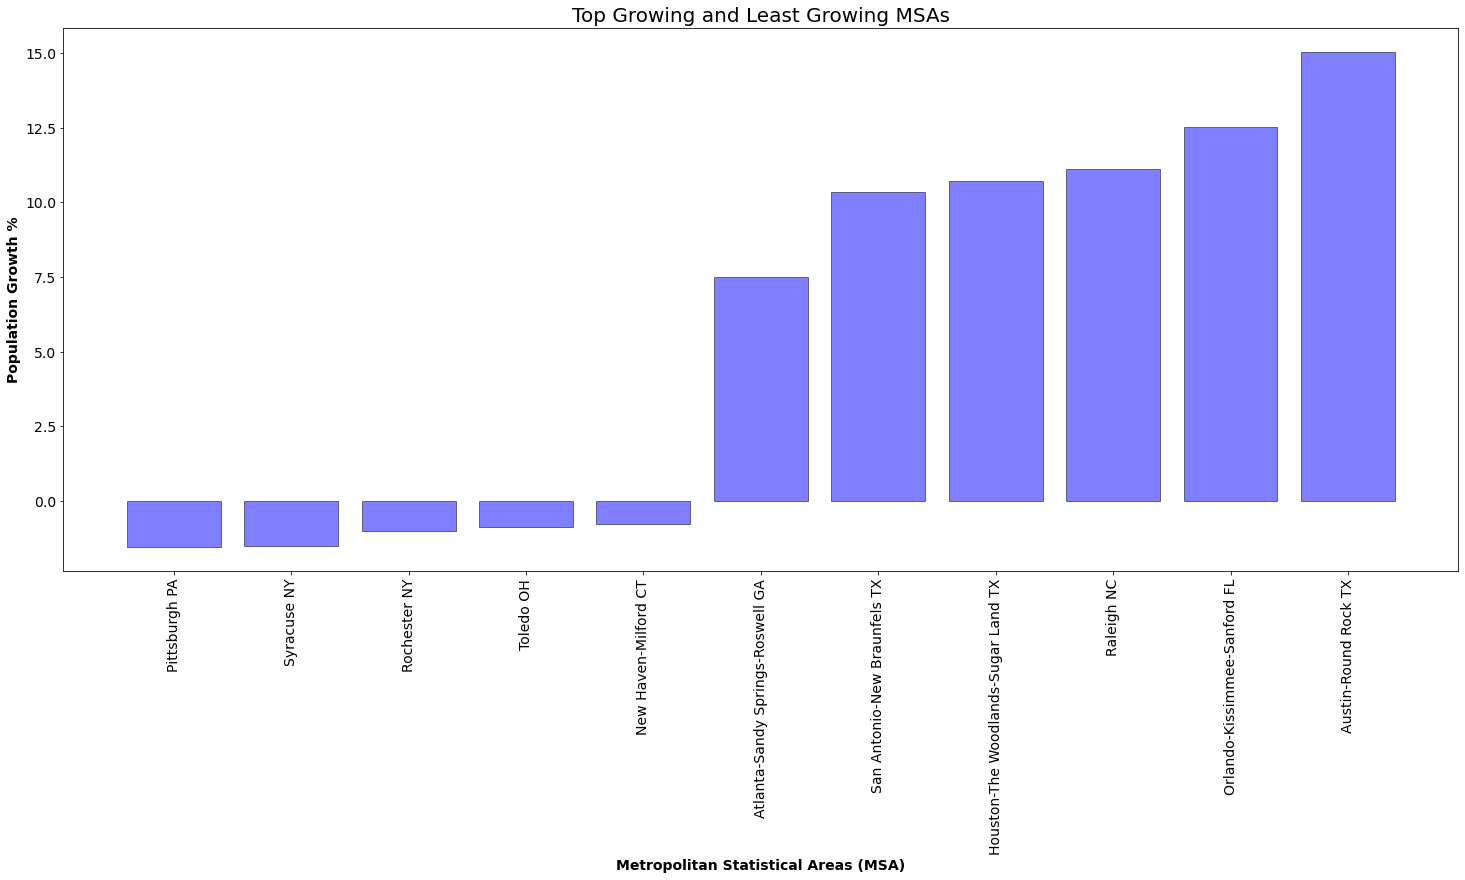

In [6]:
# Merge top growth and bottom growth dataframes into new dataframe to create one bar chart on population growth
#convert "Population_growth% values to perctange"
msa_top_growth["Population_growth_%"]= msa_top_growth["Population_growth_%"] * 100
msa_bottom_growth["Population_growth_%"]= msa_bottom_growth["Population_growth_%"] * 100
#concatenate top and bottom growth dataframes
top_bottom_growth = pd.concat([msa_top_growth, msa_bottom_growth], axis=0)
#sort population growth column
top_bottom_growth_sort=top_bottom_growth.sort_values(by=["Population_growth_%"])
#define x and y values
top_bottom_growth_names=top_bottom_growth_sort["MANAME"]
top_bottom_growth_percentage=top_bottom_growth_sort["Population_growth_%"]
#top_bottom_growth bar chart features
plt.figure(figsize=(25,10))
plt.bar(top_bottom_growth_names,top_bottom_growth_percentage,color="blue",alpha=0.5, align='center',edgecolor='black')
plt.xlabel("Metropolitan Statistical Areas (MSA)",fontsize=14,fontweight='bold')
plt.ylabel("Population Growth %",fontsize=14,fontweight='bold')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Top Growing and Least Growing MSAs",fontsize=20)
plt.savefig("../Project_1/MSATopBottomGrowthBarChart.png")
plt.show()

In [7]:
# Merge least affordable MSAs to create dataframe with all MSAs for bar chart of affordability
msa_least_affordable


,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
0,Miami-Fort Lauderdale-West Palm Beach FL,181,5799992.0,6115562.0,315570.0,0.355004,0.199829,0.111752,-0.065537,0.054409
1,Los Angeles-Long Beach-Anaheim CA,359,13048701.0,13237188.0,188487.0,0.351986,0.214925,0.132145,-0.061131,0.014445
2,San Diego-Carlsbad CA,91,3154200.0,3285371.0,131171.0,0.325995,0.223041,0.122730,-0.066062,0.041586
3,New Orleans-Metairie LA,68,1226505.0,1267576.0,41071.0,0.319187,0.122806,0.094419,-0.007666,0.033486
4,Riverside-San Bernardino-Ontario CA,137,4318479.0,4535347.0,216868.0,0.311465,0.164991,0.050333,-0.081440,0.050219


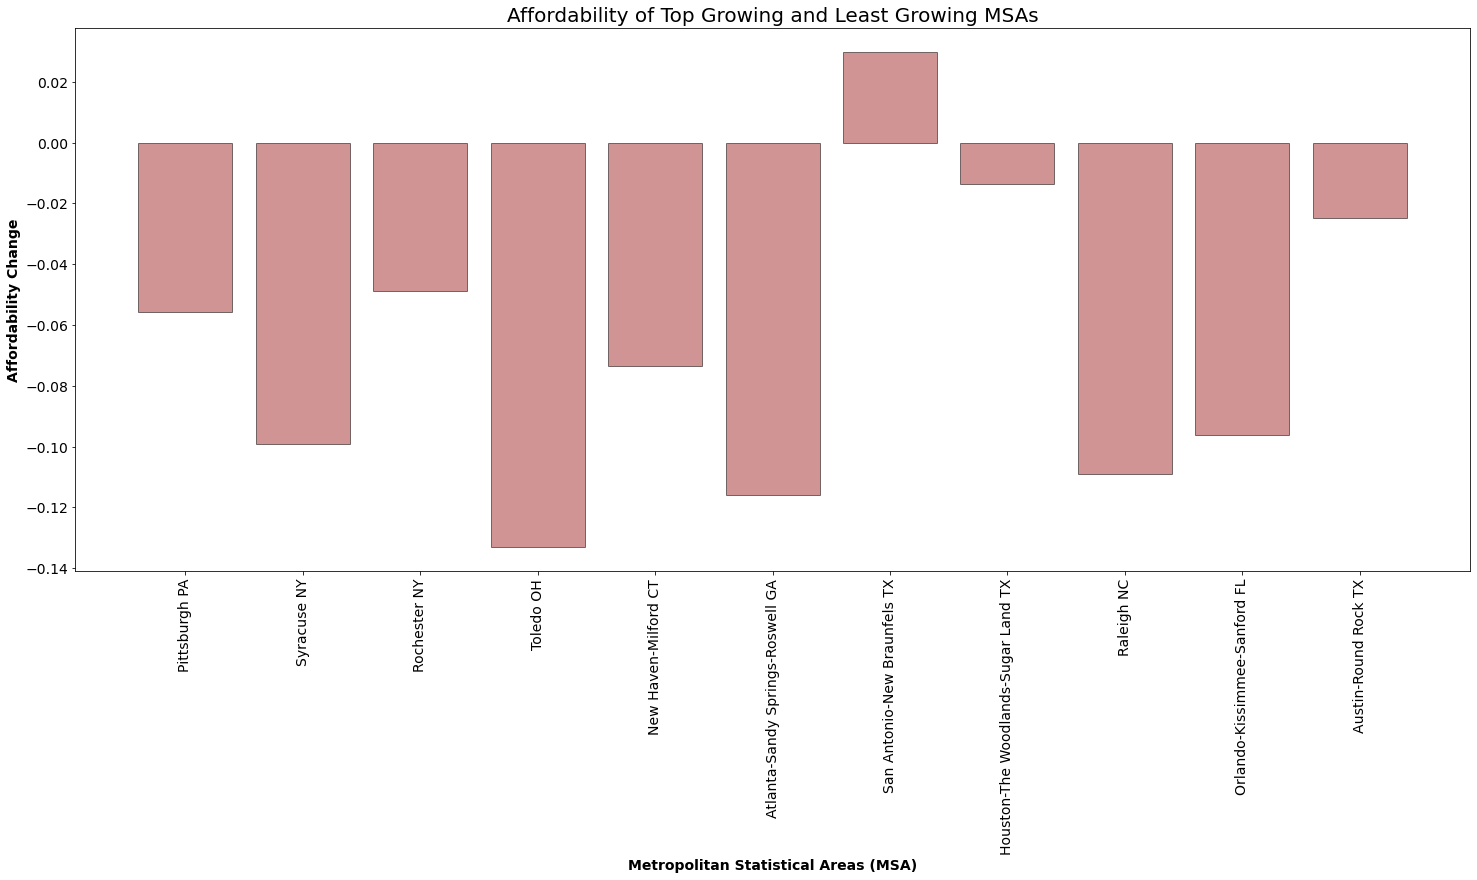

In [14]:
# Bar chart of change in affordability from the fastest and slowest growing MSAs dataframe

#concatenate top and bottom growth dataframes
top_bottom_growth = pd.concat([msa_top_growth, msa_bottom_growth], axis=0)
#sort population growth column
top_bottom_growth_sort=top_bottom_growth.sort_values(by=["Population_growth_%"])
#define x and y values
top_bottom_growth_names=top_bottom_growth_sort["MANAME"]
#top_bottom_growth_percentage=top_bottom_growth_sort["Population_growth_%"]
top_bottom_growth_afford=top_bottom_growth_sort["Affordability_Change"]
#top_bottom_growth bar chart features
plt.figure(figsize=(25,10))

plt.bar(top_bottom_growth_names,top_bottom_growth_afford,color="brown", alpha=0.5, align='center',edgecolor='black')
plt.xlabel("Metropolitan Statistical Areas (MSA)",fontsize=14,fontweight='bold')
plt.ylabel("Affordability Change",fontsize=14,fontweight='bold')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

plt.title("Affordability of Top Growing and Least Growing MSAs",fontsize=20)
plt.savefig("../Project_1/AffordabilityofFastSlowMSAsBarChart.png")
plt.show()

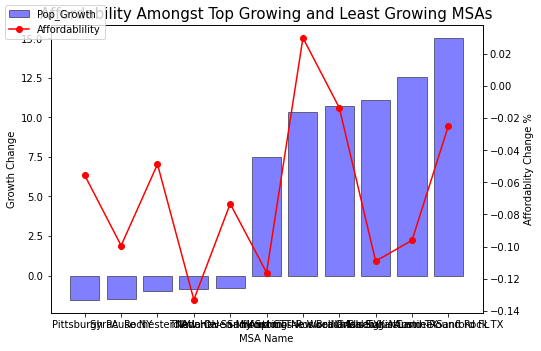

In [9]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
top_bottom_growth_sort=top_bottom_growth.sort_values(by=["Population_growth_%"])
x=top_bottom_growth_sort["MANAME"]
a1.bar(x,top_bottom_growth_percentage,color="blue",alpha=0.5, align='center',edgecolor='black')
a1.set_ylabel('Growth Change')
a1.set_xlabel("MSA Name")
a1.axhline
#a1.set_xticklabels(rotation=90,fontsize=1)
#a1.tick_params(rotation=90,fontsize=14)
a2 = a1.twinx()
a2.plot(x,top_bottom_growth_afford,'ro-')
a2.set_ylabel('Affordablity Change %')
fig.legend(labels = ('Pop_Growth','Affordablility'),loc='upper left')
plt.title("Affordability Amongst Top Growing and Least Growing MSAs",fontsize=15)
plt.savefig("../Project_1/AffordabilityAmongstFastSlowMSAsBarChart.png")
plt.show()

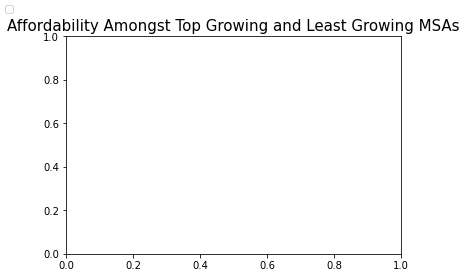

In [15]:
fig = plt.figure()

#a1 = fig.add_axes([0,0,1,1])
colors = ['r','g','b','y']
yticks =[3,2,1,0]
top_bottom_growth_sort=top_bottom_growth.sort_values(by=["Population_growth_%"])
x=top_bottom_growth_sort["MANAME"]
a1.bar(x,top_bottom_growth_percentage,color="blue",alpha=0.5, align='center',edgecolor='black')
a1.set_ylabel('Growth Change')
a1.set_xlabel("MSA Name")
#a1.set_xticklabels(rotation=90,fontsize=1)
#a1.tick_params(rotation=90,fontsize=14)
a2 = a1.twinx()
a2.plot(x,top_bottom_growth_afford,'ro-')
a2.set_ylabel('Affordablity Change %')
fig.legend(labels = ('Pop_Growth','Affordablility'),loc='upper left')
plt.title("Affordability Amongst Top Growing and Least Growing MSAs",fontsize=15)

plt.savefig("../Project_1/AffordabilityAmongstFastSlowMSAsBarChart.png")
plt.show()